In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

%matplotlib inline

In [5]:
from sklearn.datasets import load_breast_cancer
breat_cancer = load_breast_cancer()
print(breat_cancer.DESCR)

.. _breast_cancer_dataset:

Breast cancer wisconsin (diagnostic) dataset
--------------------------------------------

**Data Set Characteristics:**

    :Number of Instances: 569

    :Number of Attributes: 30 numeric, predictive attributes and the class

    :Attribute Information:
        - radius (mean of distances from center to points on the perimeter)
        - texture (standard deviation of gray-scale values)
        - perimeter
        - area
        - smoothness (local variation in radius lengths)
        - compactness (perimeter^2 / area - 1.0)
        - concavity (severity of concave portions of the contour)
        - concave points (number of concave portions of the contour)
        - symmetry
        - fractal dimension ("coastline approximation" - 1)

        The mean, standard error, and "worst" or largest (mean of the three
        worst/largest values) of these features were computed for each image,
        resulting in 30 features.  For instance, field 0 is Mean Radi

In [8]:
breat_cancer.keys()

dict_keys(['data', 'target', 'frame', 'target_names', 'DESCR', 'feature_names', 'filename', 'data_module'])

In [18]:
breast_cancer_data = breat_cancer.data
target_data = breat_cancer.target
feature_names = breat_cancer.feature_names
target = breat_cancer.target_names
print(f"Shape of the Data: {breast_cancer_data.shape}")
print(f"Features names: {feature_names}")
print(f"No. of features: {len(feature_names)}")
print(f"Targets: {target}")

Shape of the Data: (569, 30)
Features names: ['mean radius' 'mean texture' 'mean perimeter' 'mean area'
 'mean smoothness' 'mean compactness' 'mean concavity'
 'mean concave points' 'mean symmetry' 'mean fractal dimension'
 'radius error' 'texture error' 'perimeter error' 'area error'
 'smoothness error' 'compactness error' 'concavity error'
 'concave points error' 'symmetry error' 'fractal dimension error'
 'worst radius' 'worst texture' 'worst perimeter' 'worst area'
 'worst smoothness' 'worst compactness' 'worst concavity'
 'worst concave points' 'worst symmetry' 'worst fractal dimension']
No. of features: 30
Targets: ['malignant' 'benign']


In [20]:
print((target_data.T).shape)

(569,)


In [26]:
bc_features_df = pd.DataFrame(breast_cancer_data, columns=feature_names)
bc_target_df = pd.DataFrame(target_data, columns=["target"])
for title, data in {"Features": bc_features_df,"Targets":bc_target_df}.items():
    print(title)
    print(data)

Features
     mean radius  mean texture  mean perimeter  mean area  mean smoothness  \
0          17.99         10.38          122.80     1001.0          0.11840   
1          20.57         17.77          132.90     1326.0          0.08474   
2          19.69         21.25          130.00     1203.0          0.10960   
3          11.42         20.38           77.58      386.1          0.14250   
4          20.29         14.34          135.10     1297.0          0.10030   
..           ...           ...             ...        ...              ...   
564        21.56         22.39          142.00     1479.0          0.11100   
565        20.13         28.25          131.20     1261.0          0.09780   
566        16.60         28.08          108.30      858.1          0.08455   
567        20.60         29.33          140.10     1265.0          0.11780   
568         7.76         24.54           47.92      181.0          0.05263   

     mean compactness  mean concavity  mean concave po

In [31]:
bc_features_df['target'] = breat_cancer.target

## Missing data detection

In [46]:
bc_features_df.isna().sum()

mean radius                0
mean texture               0
mean perimeter             0
mean area                  0
mean smoothness            0
mean compactness           0
mean concavity             0
mean concave points        0
mean symmetry              0
mean fractal dimension     0
radius error               0
texture error              0
perimeter error            0
area error                 0
smoothness error           0
compactness error          0
concavity error            0
concave points error       0
symmetry error             0
fractal dimension error    0
worst radius               0
worst texture              0
worst perimeter            0
worst area                 0
worst smoothness           0
worst compactness          0
worst concavity            0
worst concave points       0
worst symmetry             0
worst fractal dimension    0
target                     0
dtype: int64

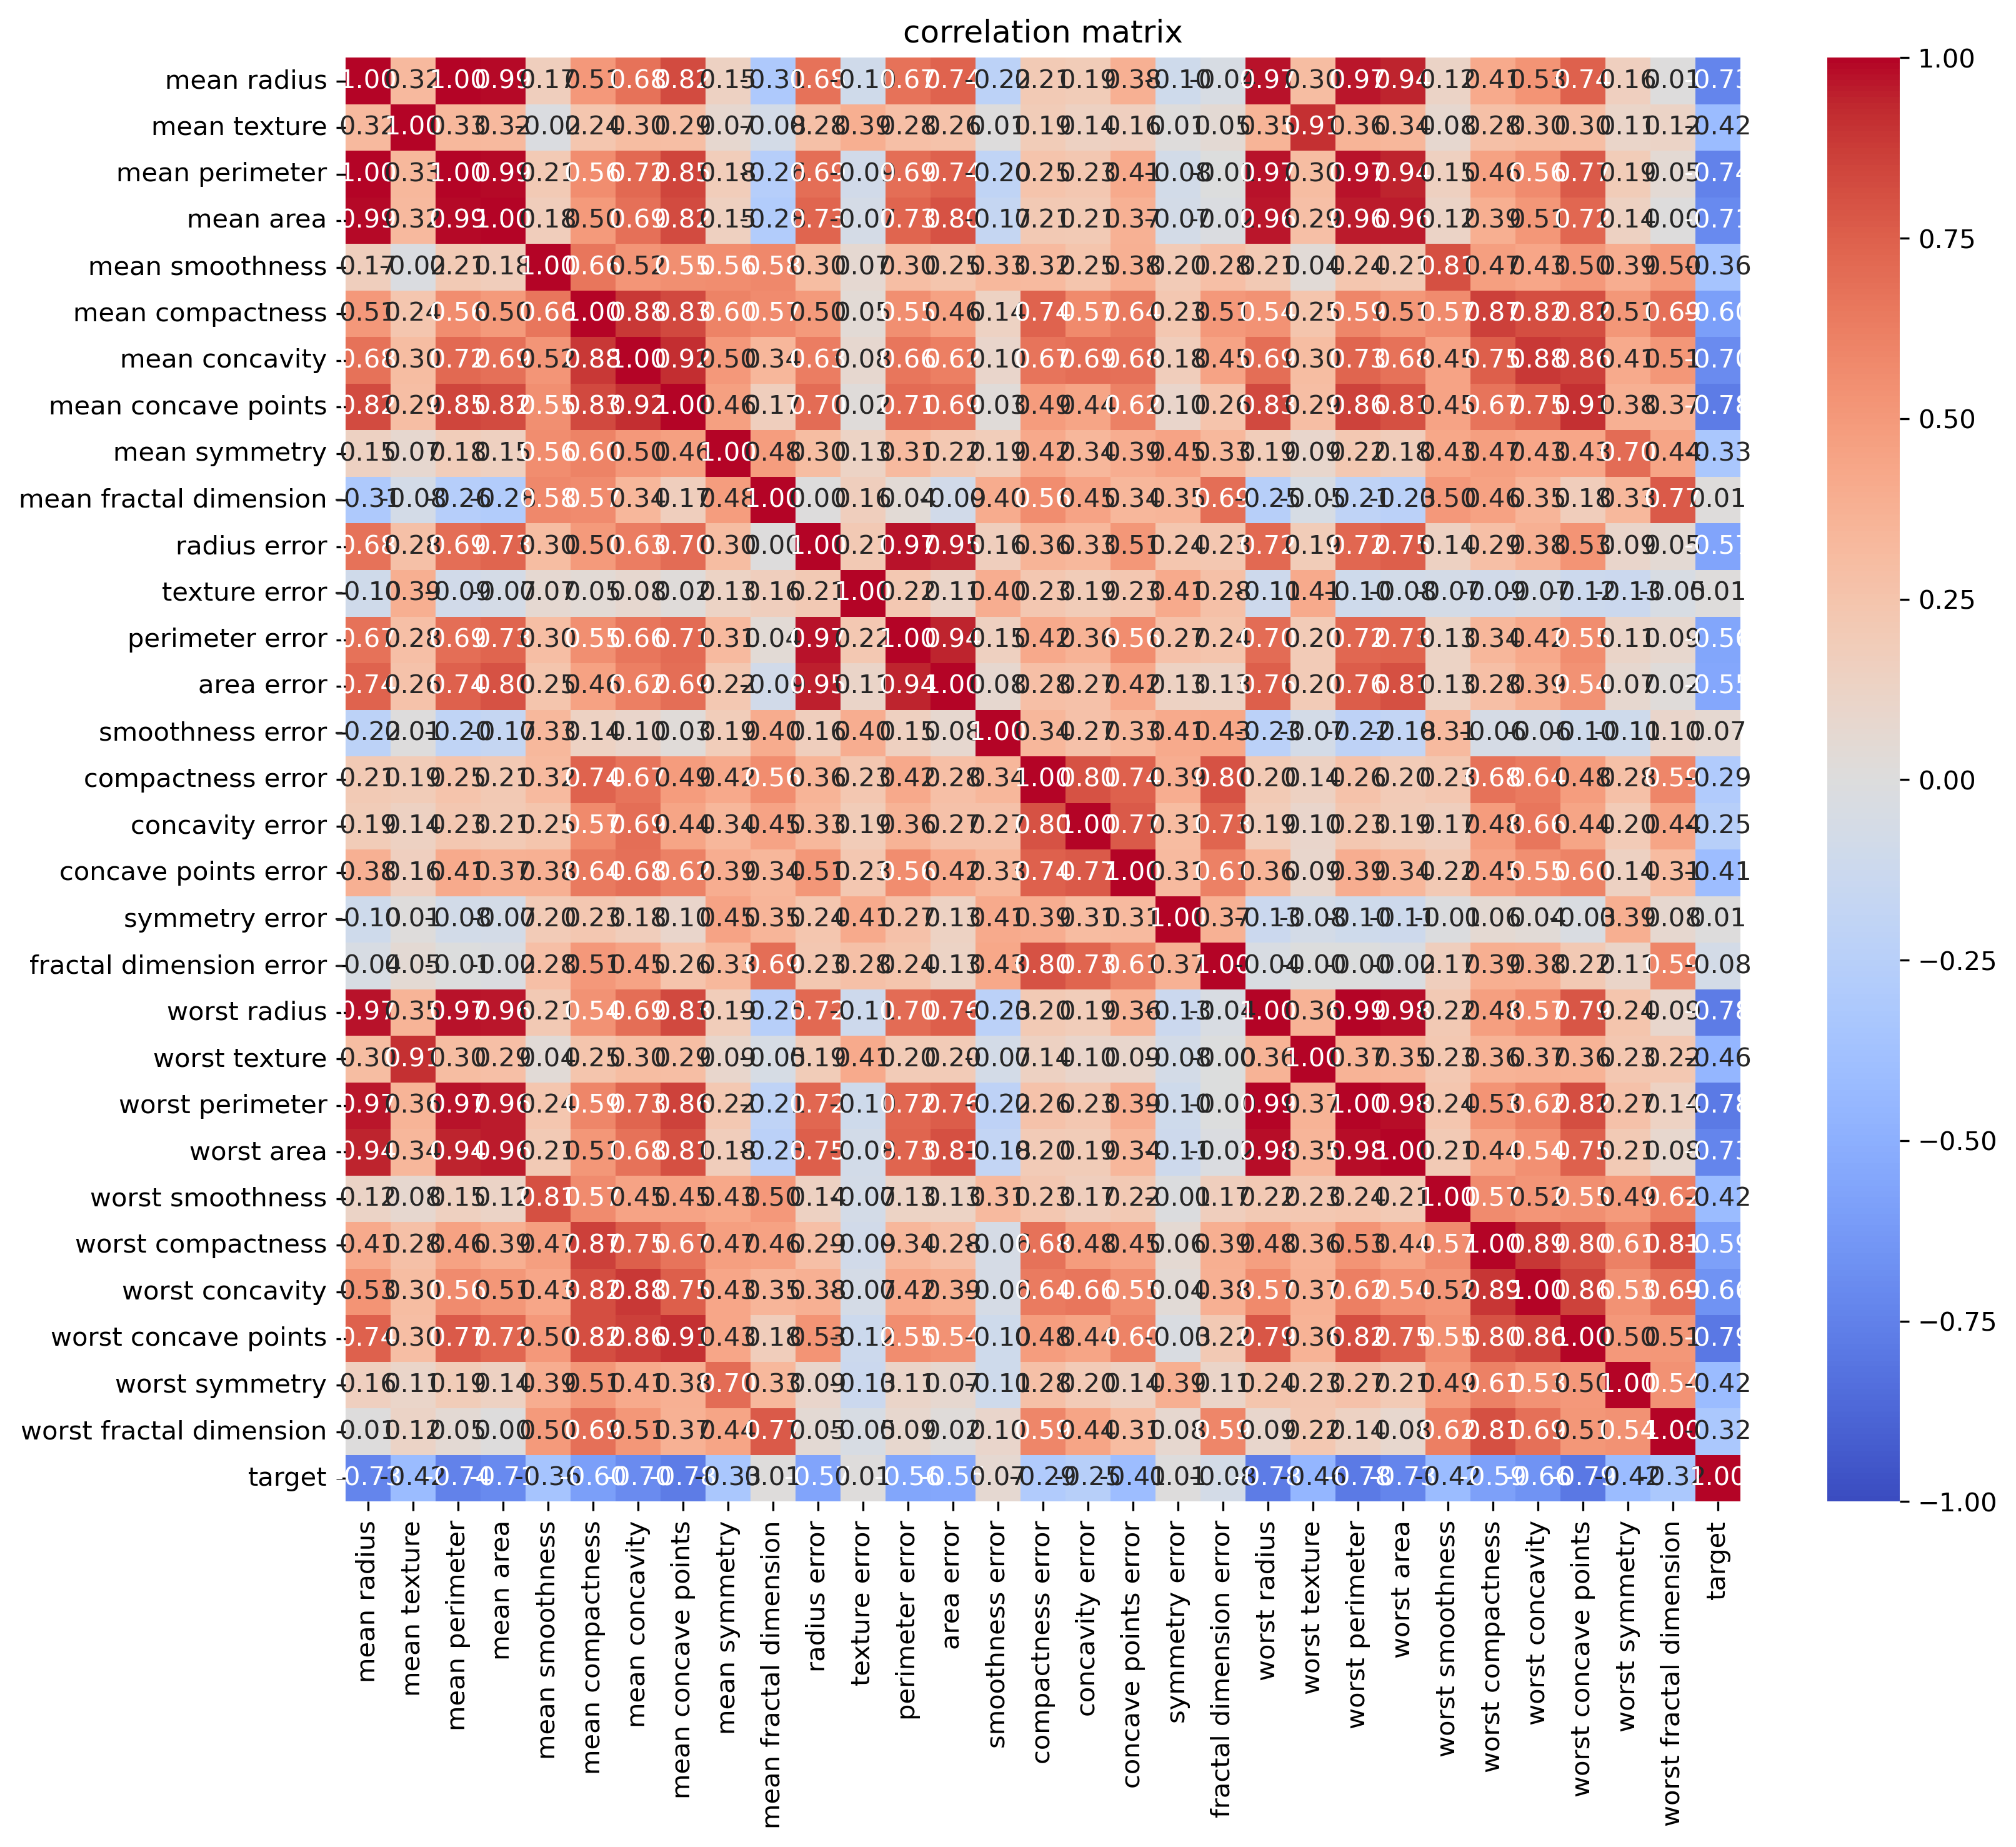

In [32]:
import seaborn as sns
corr_matrix = bc_features_df.corr()



plt.figure(figsize=(12, 10), dpi=300)
sns.heatmap(corr_matrix, cmap='coolwarm', annot=True, fmt='.2f', vmax=1, vmin=-1)
plt.title("correlation matrix")
plt.show()

In [42]:
# Getting best features based on correlation matrix

target_correlations = corr_matrix['target'].abs().sort_values(ascending=False)
threshold = 0.7
high_impact_features = target_correlations[target_correlations>threshold].index.tolist()
high_impact_features

['target',
 'worst concave points',
 'worst perimeter',
 'mean concave points',
 'worst radius',
 'mean perimeter',
 'worst area',
 'mean radius',
 'mean area']

In [41]:
# high_impact_features.remove('target')

# Optional: remove features with high inter-correlation
inter_corr_threshold = 0.8  # Define a threshold for feature inter-correlation
selected_features = high_impact_features.copy()

for feature in high_impact_features:
    if feature in selected_features:
        for other_feature in selected_features:
            if feature != other_feature and abs(corr_matrix[feature][other_feature]) > inter_corr_threshold:
                selected_features.remove(other_feature)

print("Selected Features:", selected_features)

Selected Features: ['mean perimeter', 'worst concavity', 'area error']


In [44]:
X = bc_features_df[high_impact_features]
y = bc_features_df['target']

print(f'Shape of input features: {X.shape}')
print(f'Shape of target: {y.shape}')

Shape of input features: (569, 9)
Shape of target: (569,)


In [47]:
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)


In [48]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

X_train = scaler.fit_transform(X_train)
X_test = scaler.fit_transform(X_test)


In [50]:
model = RandomForestClassifier(random_state=42)
model.fit(X_train, y_train)

# Evaluate the model
y_pred = model.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)

cross_val_scores = cross_val_score(model, X, y, cv=5)

print(f"Model Accuracy: {accuracy:.2f}")
print(f"Cross-Validation Accuracy: {cross_val_scores.mean():.2f} ± {cross_val_scores.std():.2f}")

Model Accuracy: 1.00
Cross-Validation Accuracy: 1.00 ± 0.00


In [51]:
import pickle
pickle.dump(model, open("breast_cancer_model.pkl", "wb"))